# Loading Data Files (CSV or XLSX)

In the first chapter we will learn how to load data into Pandas DataFrames. We will load multile formats of data sources including CSV files, Excel files, tables from web sites, tables in Databases, etc. 

You can review the official Pandas documentation about [reading and writing data](https://pandas.pydata.org/pandas-docs/stable/reference/io.html), or you can follow the simple examples here with real life examples. 

To make the notebooks cleaner and easier to read we will suppress warnings. Bad practice, however, OK for a tutorial.

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Loading CSV file 

The comma-separated-values (CSV) format is one of the simplest and pupolar way to share (small) data. You can save an Excel files as CSV and it is the default format of many bulk download of data from databases and other sources. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib

The first example is using data file about permits for restaurants in NY city. It was downloaded from the open data web site [data.world](https://data.world/city-of-ny/pitm-atqc), and we will use the [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) option with default values. 
* Create a new table
* from reading a CSV file in the local file system

In [3]:
table_df = (
    pd
    .read_csv('../data/open_restaurant_applications_1.csv')
)

Once we loaded the data into the table DataFrame, we can browse parts of the data and its statistics. 
* Let's start with browsing the [head](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) of the data.

In [4]:
table_df.head()

objectid                              globalid  \
0        32  ae5914d4-6080-4144-8634-98ca22b215de   
1        33  81a2bad2-5bdc-49ed-8bb6-9dc3f9798732   
2        34  b4bcb3a5-e2f7-4069-8c3b-21f47f051a63   
3        35  a1054682-ff93-4b07-8f99-daa2a7b0daaf   
4        36  1dd1f4e5-3e2c-4522-89e4-b3f4fc802436   

  seating_interest_sidewalk_roadway_both    restaurant_name  \
0                               sidewalk         Arbuz Cafe   
1                                roadway              Nerai   
2                                roadway       Hill Country   
3                                   both       Sundays Well   
4                                roadway  Le Baba Cool, Inc   

            legal_business_name doing_business_as_dba bulding_number  \
0            Arbuz Cafe NY inc.    Arbuz Cafe NY inc.           1706   
1  Koureli Restaurant Group Inc                 Nerai             55   
2    Hill Country New York, LLC          Hill Country             30   
3         Two Bridge Tavern LLC          Sundays Well            360   
4             Le Baba Cool, Inc     Le Baba Cool, Inc             64   

              street    borough  postcode  ... time_of_submission   latitude  \
0  Sheepshead Bay Rd   Brooklyn     11235  ...         2020-06-19  40.585724   
1   East 54th Street  Manhattan     10022  ...         2020-06-19  40.760117   
2          West 26th  Manhattan     10010  ...         2020-06-19        NaN   
3            3rd Ave  Manhattan     10016  ...         2020-06-19  40.740892   
4      Lafayette AVe   Brooklyn     11217  ...         2020-06-19  40.687102   

   longitude  community_board  council_district  census_tract        bin  \
0 -73.951767            315.0              48.0         606.0  3343289.0   
1 -73.973162            105.0               4.0         102.0  1035748.0   
2        NaN              NaN               NaN           NaN        NaN   
3 -73.981657            106.0               2.0          68.0  1018142.0   
4 -73.975365            302.0              35.0          35.0  3059298.0   

            bbl                                             nta  \
0  3.087700e+09  Sheepshead Bay-Gerritsen Beach-Manhattan Beach   
1  1.012900e+09                           Midtown-Midtown South   
2           NaN                                             NaN   
3  1.008820e+09                                        Gramercy   
4  3.021160e+09                                     Fort Greene   

                      location  
0  POINT(-73.951767 40.585724)  
1  POINT(-73.973162 40.760117)  
2                          NaN  
3  POINT(-73.981657 40.740892)  
4  POINT(-73.975365 40.687102)  

[5 rows x 36 columns]

As you can see, it is only showing part of the rows and parts of the columns. 

If we want to understand what are the columns of the table, we can 
* use the [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function.

In [5]:
table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7939 entries, 0 to 7938
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   objectid                                7939 non-null   int64  
 1   globalid                                7939 non-null   object 
 2   seating_interest_sidewalk_roadway_both  7939 non-null   object 
 3   restaurant_name                         7939 non-null   object 
 4   legal_business_name                     7938 non-null   object 
 5   doing_business_as_dba                   7929 non-null   object 
 6   bulding_number                          7939 non-null   object 
 7   street                                  7939 non-null   object 
 8   borough                                 7939 non-null   object 
 9   postcode                                7939 non-null   int64  
 10  business_address                        7939 non-null   obje

Next, we want to some statistics on the various numeric values. with [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) we can see how many values do we have in each numeric column and some statistics such as average, minimum, maximum and their quantiles. 

In [6]:
table_df.describe()

objectid      postcode  sidewalk_dimensions_length  \
count  7939.000000   7939.000000                 7120.000000   
mean   4006.485452  10619.992442                   34.319101   
std    2297.885878   1091.934677                   38.058425   
min      32.000000   7002.000000                    0.000000   
25%    2016.500000  10016.000000                   16.000000   
50%    4005.000000  10454.000000                   24.000000   
75%    5993.500000  11220.000000                   40.000000   
max    7992.000000  91206.000000                 1000.000000   

       sidewalk_dimensions_width  sidewalk_dimensions_area  \
count                7120.000000               7120.000000   
mean                   10.602247                410.681882   
std                     7.241442               1109.156427   
min                     0.000000                  0.000000   
25%                     6.000000                120.000000   
50%                     8.000000                225.000000   
75%                    14.000000                420.000000   
max                    50.000000              50000.000000   

       roadway_dimensions_length  roadway_dimensions_width  \
count                5080.000000               5080.000000   
mean                   31.530709                  8.590945   
std                    30.240655                  4.384592   
min                     0.000000                  0.000000   
25%                    17.000000                  8.000000   
50%                    24.000000                  8.000000   
75%                    38.000000                  8.000000   
max                  1000.000000                 50.000000   

       roadway_dimensions_area     latitude    longitude  community_board  \
count              5080.000000  6943.000000  6943.000000      6943.000000   
mean                280.760236    40.732316   -73.952988       231.494167   
std                 513.508993     0.057959     0.061280       128.857022   
min                   0.000000    40.511019   -74.248014       101.000000   
25%                 128.000000    40.705540   -73.990058       105.000000   
50%                 192.000000    40.734268   -73.968501       208.000000   
75%                 320.000000    40.761935   -73.922195       314.000000   
max               25000.000000    40.911190   -73.702668       503.000000   

       council_district   census_tract           bin           bbl  
count       6943.000000    6943.000000  6.888000e+03  6.888000e+03  
mean          17.970906    3241.251476  2.332593e+06  2.277429e+09  
std           15.370382   13737.582279  1.329363e+06  1.296711e+09  
min            1.000000       1.000000  1.000000e+06  0.000000e+00  
25%            3.000000      70.000000  1.026910e+06  1.008740e+09  
50%           15.000000     151.000000  2.046050e+06  2.037640e+09  
75%           33.000000     483.500000  3.335991e+06  3.066340e+09  
max           51.000000  157903.000000  5.169029e+06  5.080430e+09

You can modify the percentile that are calculated for the numeric columns by setting the values that you care about. 
* Start with the table above
* Describe the distribution of the numeric values
* Add the percentile values for p10, p50 and p90

In [7]:
(
    table_df
    .describe(
        percentiles = [.10, .5, .90]
    )
)

objectid      postcode  sidewalk_dimensions_length  \
count  7939.000000   7939.000000                 7120.000000   
mean   4006.485452  10619.992442                   34.319101   
std    2297.885878   1091.934677                   38.058425   
min      32.000000   7002.000000                    0.000000   
10%     825.800000  10009.000000                   12.000000   
50%    4005.000000  10454.000000                   24.000000   
90%    7197.200000  11369.000000                   70.000000   
max    7992.000000  91206.000000                 1000.000000   

       sidewalk_dimensions_width  sidewalk_dimensions_area  \
count                7120.000000               7120.000000   
mean                   10.602247                410.681882   
std                     7.241442               1109.156427   
min                     0.000000                  0.000000   
10%                     4.000000                 64.000000   
50%                     8.000000                225.000000   
90%                    19.000000                800.000000   
max                    50.000000              50000.000000   

       roadway_dimensions_length  roadway_dimensions_width  \
count                5080.000000               5080.000000   
mean                   31.530709                  8.590945   
std                    30.240655                  4.384592   
min                     0.000000                  0.000000   
10%                    12.000000                  6.000000   
50%                    24.000000                  8.000000   
90%                    60.000000                  9.000000   
max                  1000.000000                 50.000000   

       roadway_dimensions_area     latitude    longitude  community_board  \
count              5080.000000  6943.000000  6943.000000      6943.000000   
mean                280.760236    40.732316   -73.952988       231.494167   
std                 513.508993     0.057959     0.061280       128.857022   
min                   0.000000    40.511019   -74.248014       101.000000   
10%                  96.000000    40.661594   -74.003282       102.000000   
50%                 192.000000    40.734268   -73.968501       208.000000   
90%                 504.000000    40.795218   -73.869113       405.000000   
max               25000.000000    40.911190   -73.702668       503.000000   

       council_district   census_tract           bin           bbl  
count       6943.000000    6943.000000  6.888000e+03  6.888000e+03  
mean          17.970906    3241.251476  2.332593e+06  2.277429e+09  
std           15.370382   13737.582279  1.329363e+06  1.296711e+09  
min            1.000000       1.000000  1.000000e+06  0.000000e+00  
10%            2.000000      38.000000  1.007896e+06  1.004610e+09  
50%           15.000000     151.000000  2.046050e+06  2.037640e+09  
90%           39.000000    2602.000000  4.087712e+06  4.030800e+09  
max           51.000000  157903.000000  5.169029e+06  5.080430e+09

## Simple data visualization

As part of the data exploration phase, you want to look at the columns, a few rows (_head_), column statistics (_describe_), data types and number of values (_info_). However, usually the most effective way is to visualize the data to understand it. 

* Start with the table above
* Plot the values
* as scatter plot of the data with
* _longitude_ and _latitude_ as x-axis and y-axis, respectively.

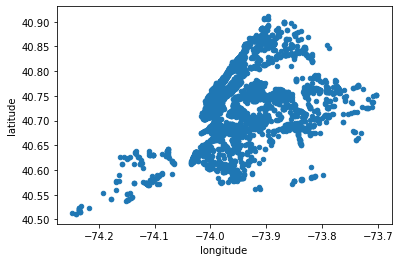

In [8]:
(
    table_df
    .plot
    .scatter(
        x='longitude',
        y='latitude'
    )
);

## Adding new columns

One of the most common tasks that we do when building an analysis is to add calcualted fields, based on the other columns in our table/DataFrame. We will discuss power of Pandas in adding new columns in the next sections of this guide. However, here is an example of calcuting the color of a data point, based on the value of _approved_for_roadway_seating_ column. It will be green (_g_) if the value is _yes_, or red (_r_) otherwise.
* Start with the loaded table data DataFrame
* Add a column to color approval (_approved_) for road way seating as green (_g_)
* change the color value of _approved_ to red (_r_) if the value of _approved_for_roadway_seating_ is _no_
* Plot the result
* as a scatter plot with each place 
* color as defined above and
* in the geo location from longitude and latitude columns

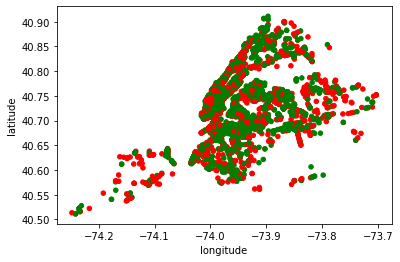

In [9]:
(
    table_df
    .asign(approved = 'g')
    .loc[table_df.approved_for_roadway_seating == 'no', 'approved'] = 'r'
    .plot
    .scatter(
        c='approved',
        x='longitude',
        y='latitude'
    )
);

## Loading Excel Files

You can also read files that were edited in Excel and saved in the Excel format.

If the python environment that we are using is missing part of the needed functionality, such as the ability to parse the format of the Microsoft Excel files, we need to install using the following command:

In [10]:
pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Then, we can call _read_excel_ instead of _read_csv_

In [11]:
table_df_from_excel = (
    pd
    .read_excel('../data/open_restaurant_applications.xlsx')
)

and since the data now is in the Pandas (_pd_) DataFrame format, all the rest of the commands are exactly the same. For example, here is the same first chart we plotted before.

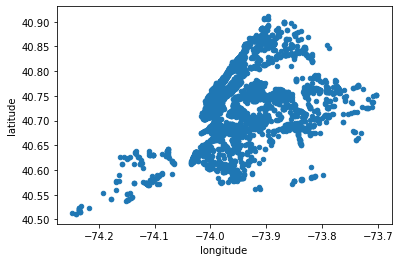

In [13]:
(
    table_df_from_excel
    .plot
    .scatter(
        x='longitude',
        y='latitude'
    )
);